<a href="https://colab.research.google.com/github/souchem23/data-science-coursework/blob/main/Unit7/SoumikC_U7Proj_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Unit 7 Project: Humidity Prediction**

In the context of global warming, we know that global temperatures will rapidly increase, creating significant detrimental issues. Thus, I undertook this project to predict how our humidity will change, and I will use various meterological factors to predict it.

**Context**

Solar radiation has been increasing over the last few years, and is fueling climate change in our modern society. This is likely due to holes and the weakening of our ozone layer.

*   It is very important to predict these changes in humidity so that we can better anticipate climate change.
*   We can anlayze meteorological factors and changes in order to determine how humidity is present in our modern society.
*   I am fascinated in climate change, and I want to know how we can better predict the effects of humidity and radiation.



## **Package Installation**

In [1]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi
!pip install preliz

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-k0i6areg
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-k0i6areg
  Resolved https://github.com/pydata/xarray.git to commit 4c2540de54af8d9da4456715d7dcac6b16f330d8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev33+g4c2540de-py3-none-any.whl size=1265491 sha256=26abec06ecc0367f529def68add0924ae350ba5690e474dce73ba531c70f6e1e
  Stored in directory: /tmp/pip-ephem-wheel-cache-4mi4jamv/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 5.8 MB/s eta 0:00:00
   ━

In [2]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb
import pymc as pm

## **Data Processing**

In [3]:
# Reading in the data
solarDataURL = 'https://raw.githubusercontent.com/souchem23/data-science-coursework/refs/heads/main/solar.csv'

# Creating dataframe representation
solarData = pd.read_csv(solarDataURL)
solarData = solarData.head(1000)

# Display processed data
solarData

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
995,1474919419,9/26/2016 12:00:00 AM,09:50:19,833.84,57,30.45,72,87.81,6.75,06:12:00,18:15:00
996,1474919118,9/26/2016 12:00:00 AM,09:45:18,821.11,57,30.45,69,91.00,3.37,06:12:00,18:15:00
997,1474918826,9/26/2016 12:00:00 AM,09:40:26,805.68,58,30.45,65,2.38,4.50,06:12:00,18:15:00
998,1474918520,9/26/2016 12:00:00 AM,09:35:20,791.78,57,30.45,66,61.29,10.12,06:12:00,18:15:00


## **Casual Diagram**

In [31]:
import graphviz

dot = graphviz.Digraph(format='png')

dot.node("Radiation", "Radiation")
dot.node("Temperature", "Temperature")
dot.node("Pressure", "Pressure")
dot.node("Humidity", "Humidity")
dot.node("WindDirection", "Wind Direction")
dot.node("Speed", "Wind Speed")

dot.edge("Radiation", "Temperature")
dot.edge("Radiation", "Pressure")
dot.edge("Radiation", "Humidity")
dot.edge("Radiation", "WindDirection")
dot.edge("Radiation", "Speed")

dot.edge("Temperature", "Pressure")
dot.edge("Temperature", "Humidity")
dot.edge("Temperature", "Speed")

dot.edge("Pressure", "Speed")
dot.edge("Pressure", "WindDirection")

dot.edge("Speed", "WindDirection")

dot.edge("WindDirection", "Humidity")
dot.edge("Pressure", "Humidity")

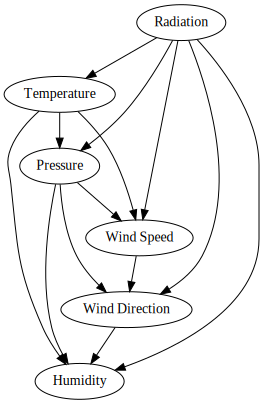

In [32]:
dot

**Selected Variables**

For this project, I will chosoe to create model using the following variables:

*   Temperature
*   Radiation
*   Wind Direction

Looking at my casual diagrams, I was able to observe that these three variables directly affect humidity, and I will use these variables to also observe the interactions between the variables.



## **Chosen Models**

**Knots**

In [5]:
knots_one = [45,50]
knots_two = [30.36,30.47]
knots_three = [0,30]

**Linear Model**

In [13]:
linmodel1 = bmb.Model("Humidity ~ Temperature + Radiation + WindDirection", data=solarData)
idatalin1 = linmodel1.fit(idata_kwargs={'log_likelihood': True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


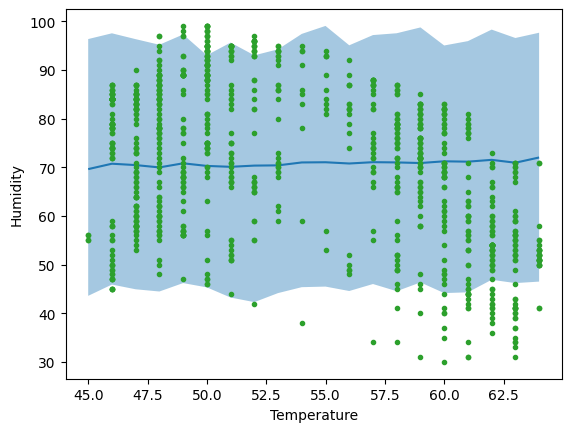

In [9]:
bmb.interpret.plot_predictions(linmodel1, idatalin1, "Temperature", pps=True)
plt.plot(solarData.Temperature,solarData.Humidity, "C2.")

**Model 1**

In [15]:
model_poly = bmb.Model("Humidity ~ poly(Temperature, degree=4)", solarData, family="weibull")
idata_poly = model_poly.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


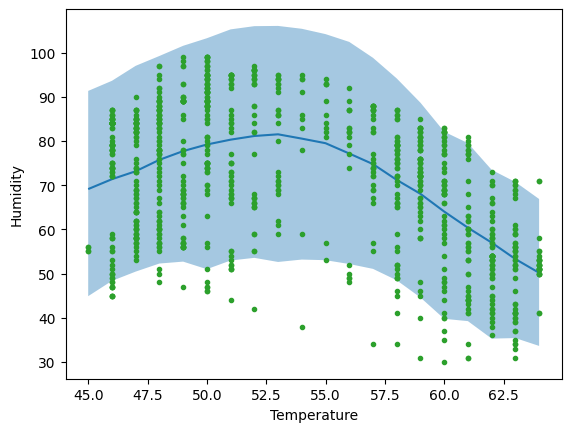

In [14]:
bmb.interpret.plot_predictions(model_poly, idata_poly, "Temperature", pps=True)
plt.plot(solarData.Temperature,solarData.Humidity, "C2.")

**Model 2**

In [16]:
model_poly2 = bmb.Model("Humidity ~ poly(Temperature+Radiation, degree=4)", solarData, family="weibull")
idata_poly2 = model_poly2.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


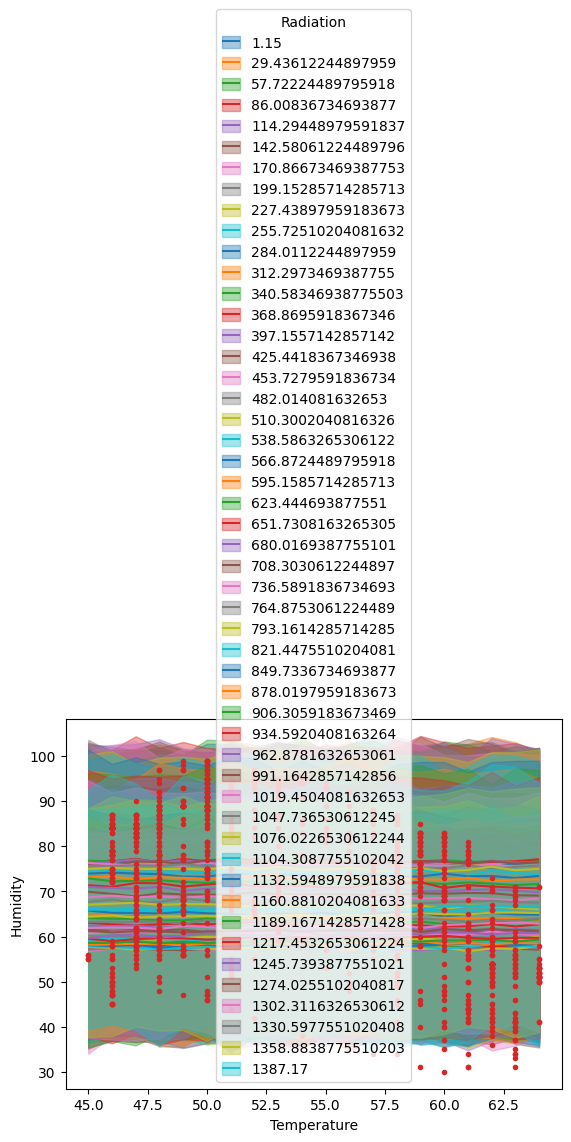

In [16]:
bmb.interpret.plot_predictions(model_poly2, idata_poly2, ["Temperature", "Radiation"], pps=True)
plt.plot(solarData.Temperature,solarData.Humidity, "C3.")

**Model 3**

In [17]:
num_knots = 6
knots = np.linspace(45, 50, num_knots+2)[1:-1]
bspline_1 = bmb.Model(
    "Humidity ~ bs(Temperature, knots=knots)",
    solarData,
    family="weibull"
)
idata_1 = bspline_1.fit(idata_kwargs={"log_likelihood": True})

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


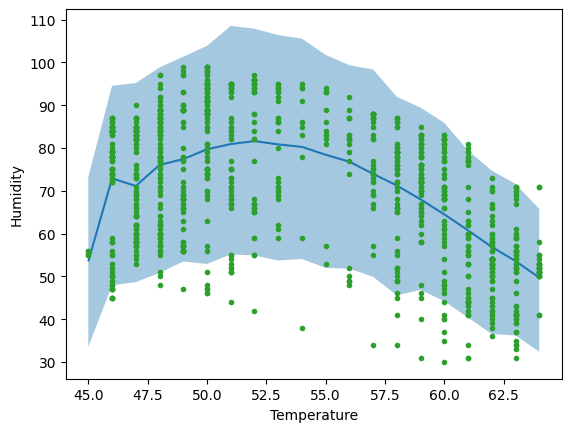

In [21]:
bmb.interpret.plot_predictions(bspline_1, idata_1, "Temperature", pps=True)
plt.plot(solarData.Temperature,solarData.Humidity, "C2.")

**Model 4**

In [18]:
num_knots = 3
knots1 = np.linspace(knots_one[0], knots_one[1], num_knots+2)[1:-1]
knots2 = np.linspace(knots_two[0], knots_two[1], num_knots+2)[1:-1]
knots3 = np.linspace(knots_three[0], knots_three[1], num_knots+2)[1:-1]
bspline_3 = bmb.Model(
    "Humidity ~ bs(Temperature, knots=knots1) + bs(Pressure, knots=knots2)",
    solarData,
    family="weibull"
)
idata_3 = bspline_3.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


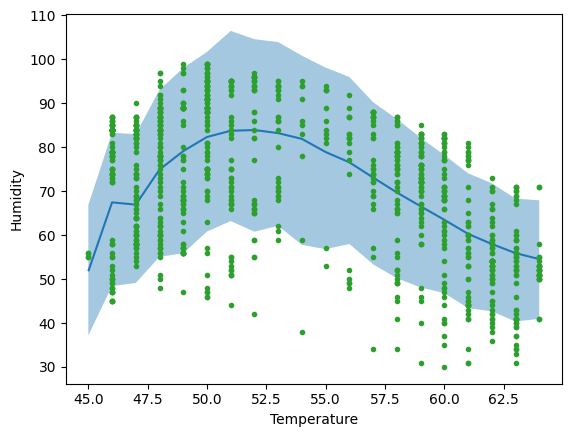

In [20]:
bmb.interpret.plot_predictions(bspline_3, idata_3, "Temperature", pps=True)
plt.plot(solarData.Temperature,solarData.Humidity, "C2.")

**Model 5**

In [19]:
num_knots = 3
knots1 = np.linspace(knots_one[0], knots_one[1], num_knots+2)[1:-1]
knots2 = np.linspace(knots_two[0], knots_two[1], num_knots+2)[1:-1]
knots3 = np.linspace(knots_three[0], knots_three[1], num_knots+2)[1:-1]
bspline_4 = bmb.Model(
    "Humidity ~ bs(Temperature, knots=knots1) + bs(WindDirection, knots=knots3)",
    solarData,
    family="weibull"
)
idata_4 = bspline_4.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


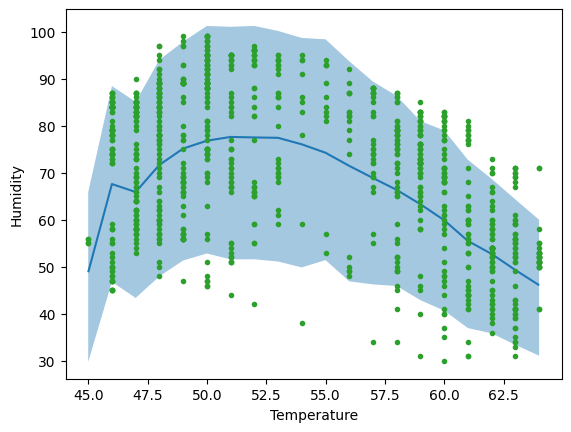

In [23]:
bmb.interpret.plot_predictions(bspline_4, idata_4, "Temperature", pps=True)
plt.plot(solarData.Temperature,solarData.Humidity, "C2.")

**Model 6**

In [20]:
num_knots = 3
knots1 = np.linspace(knots_one[0], knots_one[1], num_knots+2)[1:-1]
knots2 = np.linspace(knots_two[0], knots_two[1], num_knots+2)[1:-1]
knots3 = np.linspace(knots_three[0], knots_three[1], num_knots+2)[1:-1]
bspline_5 = bmb.Model(
    "Humidity ~ bs(Radiation, knots=knots2) + bs(WindDirection, knots=knots3)",
    solarData,
    family="weibull"
)
idata_5 = bspline_5.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


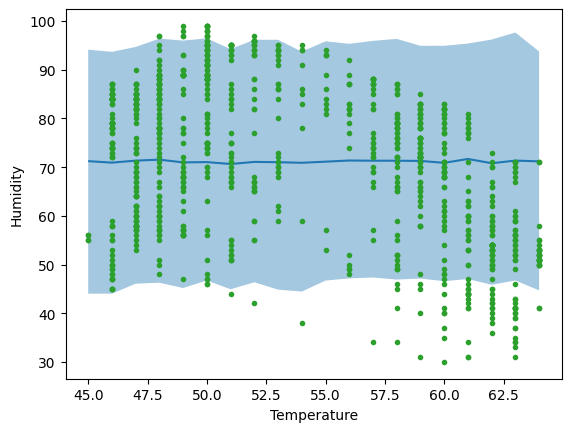

In [28]:
bmb.interpret.plot_predictions(bspline_5, idata_5, "Temperature", pps=True)
plt.plot(solarData.Temperature,solarData.Humidity, "C2.")

**Model 7**

In [21]:
num_knots = 3
knots1 = np.linspace(knots_one[0], knots_one[1], num_knots+2)[1:-1]
knots2 = np.linspace(knots_two[0], knots_two[1], num_knots+2)[1:-1]
knots3 = np.linspace(knots_three[0], knots_three[1], num_knots+2)[1:-1]
bspline_6 = bmb.Model(
    "Humidity ~ bs(Radiation, knots=knots2) + bs(WindDirection, knots=knots3) + bs(Temperature, knots=knots1)",
    solarData,
    family="weibull"
)
idata_6 = bspline_6.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


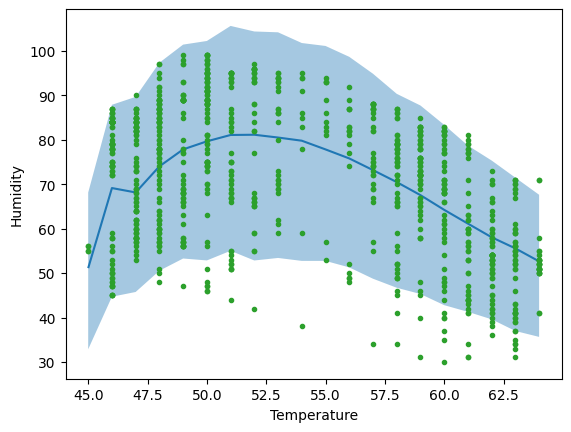

In [29]:
bmb.interpret.plot_predictions(bspline_6, idata_6, "Temperature", pps=True)
plt.plot(solarData.Temperature,solarData.Humidity, "C2.")

**Model 8**

In [6]:
num_knots = 6
knots1 = np.linspace(knots_one[0], knots_one[1], num_knots+2)[1:-1]
knots2 = np.linspace(knots_two[0], knots_two[1], num_knots+2)[1:-1]
knots3 = np.linspace(knots_three[0], knots_three[1], num_knots+2)[1:-1]
bspline_7 = bmb.Model(
    "Humidity ~ bs(Pressure, knots=knots2) + bs(Radiation, knots=knots3) + bs(Temperature, knots=knots1)",
    solarData,
    family="weibull"
)
idata_7 = bspline_7.fit(idata_kwargs={"log_likelihood": True})

 Progress                    Draws   Divergences   Step size   Grad evals   Sampling Speed   Elapsed   Remaining  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  ━━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             0.00        1023         2.77 draws/s     0:12:01   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━━   2000    15            0.00        1023         1.42 draws/s     0:23:27   0:00:00

ERROR:pymc.stats.convergence:There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


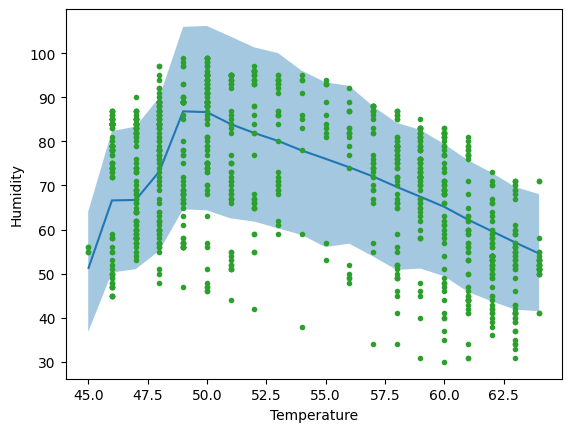

In [9]:
bmb.interpret.plot_predictions(bspline_7, idata_7, "Temperature", pps=True)
plt.plot(solarData.Temperature,solarData.Humidity, "C2.")

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

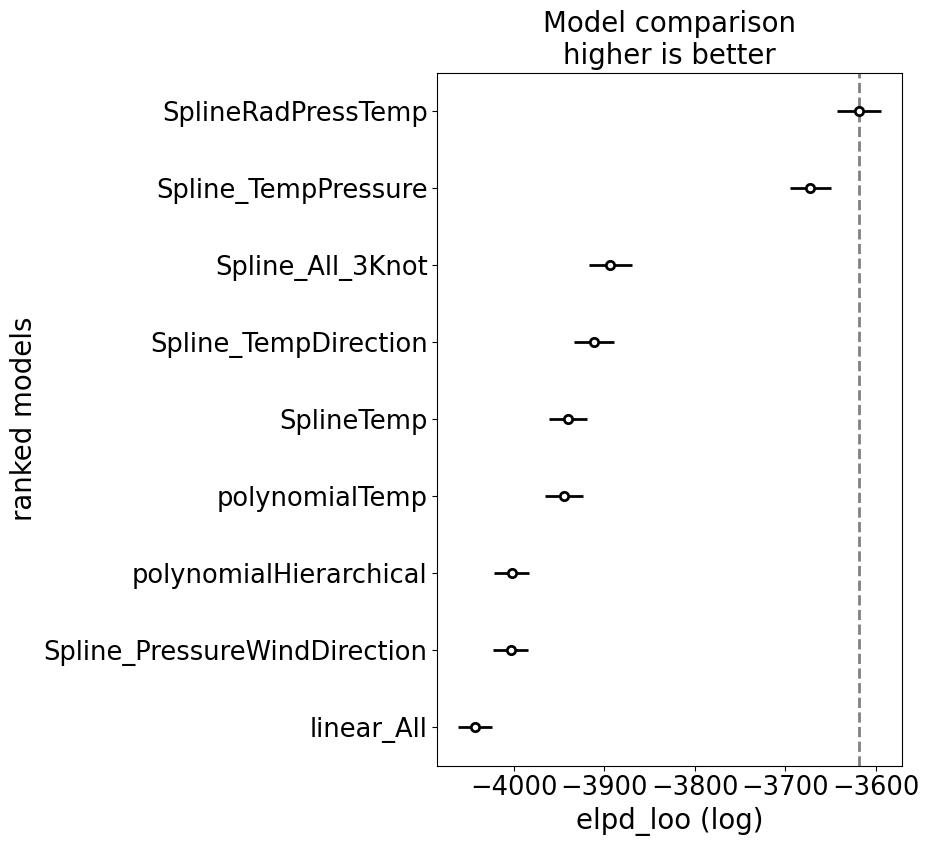

In [22]:
compareModels = az.compare({"linear_All":idatalin1, "polynomialTemp":idata_poly, "polynomialHierarchical":idata_poly2, "SplineTemp":idata_1, "Spline_TempPressure":idata_3, "Spline_TempDirection":idata_4, "Spline_PressureWindDirection":idata_5, "Spline_All_3Knot":idata_6, "SplineRadPressTemp":idata_7})
az.plot_compare(compareModels)

## **Analysis**

**Quantitative Analysis**



If we take a look at the elpd_loo values, we can see that the b-spline model incorporating only pressure, radiation, and temperature predictors performed the best, in relation to the other models.

I first started with a linear model, to create a base comparison and see if a simple model would actually work better. What I ended up finding was that the linear model performed a lot worse than the rest of the b-spline models. I even compared the b-splines to a simple polynomial model to determine which model was the best. I found that the b-spline model with all of them was the best.

I was actually interested to see that the linear model performed the worst. Let me explain why!

Note, that it is important to reocognize that my model actually performed well with the polynomial regression, highlighting that although splines improved accuracy, they were not needed.

**Qualitiative Analysis**

When looking at the best model, I was a little bit confused to see that the best models actually had a downward trend near approximately 46 degrees. The models seemed to be peroforming very well on the rest of the data, capturing the downwoard parabola-like curve of the data as the temperature grew larger.

This does not make much sense to reality. It is a very discrete part of the curve, and does not seem to fit will with the rest of the nature of the data. Honestly, the polymomial model more accurately models the trend. Although it does not have a discrete angled part of the curve trend, it still maintains the curve trend observed in the other models.. So, it increase and matches the current trends in humidity.

I think it is also important to consider the WindDirection and Radiation b-spline model. It performed very bad and simply created a straight line graph. When we consider it in context, I think that wind direction and radiation by themselves are not always indicative of humditiy. By themselves, they could represent trends for other catastrophic events like hurricanes and tornadoes. So, by themselves, they are not always going to be true to reality. similarly, temperature by itself also has the same problem. We could have a lot of  humidity, but if it is cloudy outside, it will be a lower temperature. So, we need a majority of the variables. This is why the model that incorporates temperature with pressure performs the best (according to elpd_loo ranking).

**The best model, I would say, is the Spline_TempPressure model because it uses the two variables in my diagram and produces similar results to the other models with all three variables.** I noticed that the other predictors (WindDirection, Temperature, Solar Radiation) were creating collision between the predictors, and this is creating some difficulties for the models to produce results. They are in the middle of my casual diagram with arrows going through them, so mathemtically, it is creating collisions for the model. Thus, the **Spline_TempPressure** model returns the most accurate models.

Also, I think it is going to be important to address the fact that we don't actually need b-splines for this data. The linear model and the polynomial model perform similar results. Although it is not needed, it still helps to improve our model accuracy (based on higher elpd_loo values).